#      <center> COVID-19 Data Analysis: Algeria and the World </center>

### <center> Sami Belkacem, PhD Student in Artificial Intelligence, USTHB University </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
df = pd.read_csv(r"Data.csv")

In [4]:
df = df.round(3)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-24,1804.0,35960.0,1456.0
38468,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-25,2965.0,35994.0,1458.0
38469,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-26,NaN,36044.0,1463.0
38470,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-27,NaN,36058.0,1463.0


In [5]:
df.isnull().sum()

Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests                        7895
Cases                               254
Deaths                             3610
dtype: int64

In [5]:
df = df.groupby('Entity').apply(lambda x: x.fillna(method='ffill'))
df = df.groupby('Entity').apply(lambda x: x.fillna(method='bfill'))
df = df[df.Cases > 0]

# 5- Statistical description of the data

In [6]:
df.describe().round(2)

,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,38472.00,38472.00,38472.00,38472.00,38472.00,38472.00,3.847200e+04,38472.00,38472.00,38472.00,38472.00,38472.00
mean,23.74,20.21,17.72,3.17,2.09,19002.33,4.896983e+07,32.75,10.66,33716.13,286001.87,7331.45
std,26.06,61.07,8.13,2.56,1.52,22271.11,1.427251e+08,8.47,6.77,135758.11,1400790.28,28226.96
min,-40.90,-106.35,-2.00,0.20,0.02,411.60,3.412840e+05,16.00,1.00,-239172.00,1.00,1.00
25%,8.62,-3.44,11.00,1.40,0.82,3659.00,4.793900e+06,27.00,5.00,1243.00,1986.00,32.00
50%,27.51,21.82,20.00,2.50,1.89,8821.80,1.148464e+07,32.00,8.00,4647.50,20722.50,342.00
75%,45.94,47.48,25.00,4.49,3.21,25946.20,4.286296e+07,41.00,16.00,18012.25,135999.75,2750.25
max,64.96,179.41,29.00,13.05,7.52,114704.60,1.339180e+09,48.00,28.00,2945871.00,28605669.00,513091.00


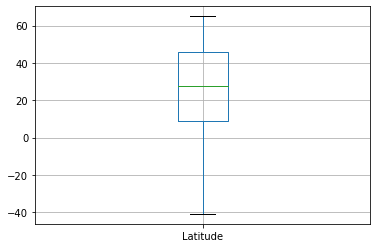

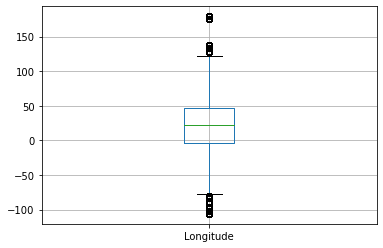

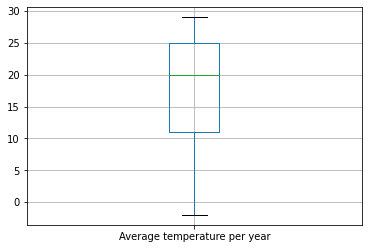

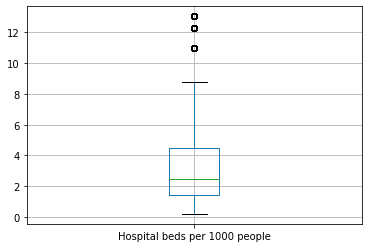

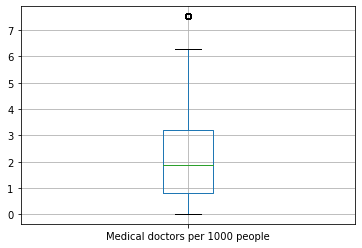

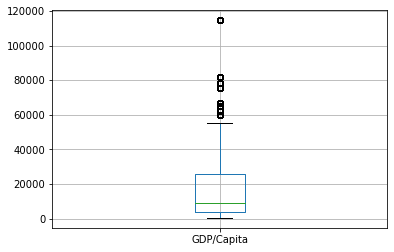

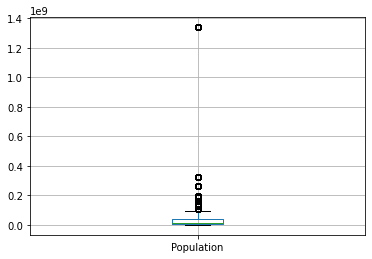

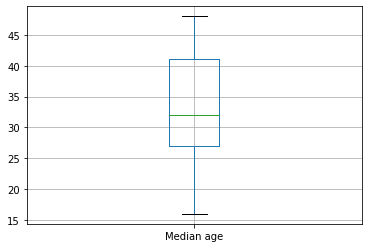

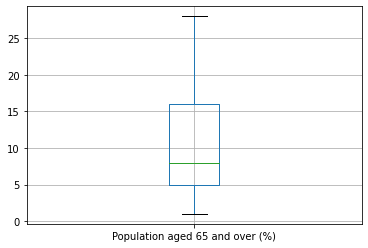

In [7]:
for column in df.drop(['Entity', 'Continent', 'Date', 'Daily tests', 'Cases', 'Deaths'], axis=1):
    plt.figure()
    df.boxplot([column])

# 6- Visualize the data

## Feature distribution with histograms

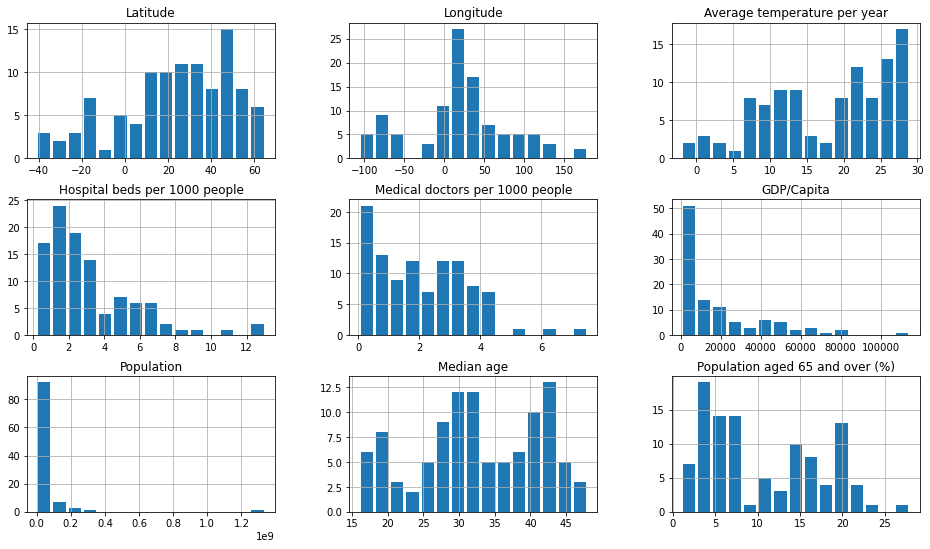

In [8]:
columns = ['Date', 'Daily tests', 'Cases', 'Deaths']
df.drop(columns, axis=1).drop_duplicates().hist(bins=15, figsize=(16, 9), rwidth=0.8)
plt.show()

## Feature correlation with a heatmap: Last cases and deaths to date

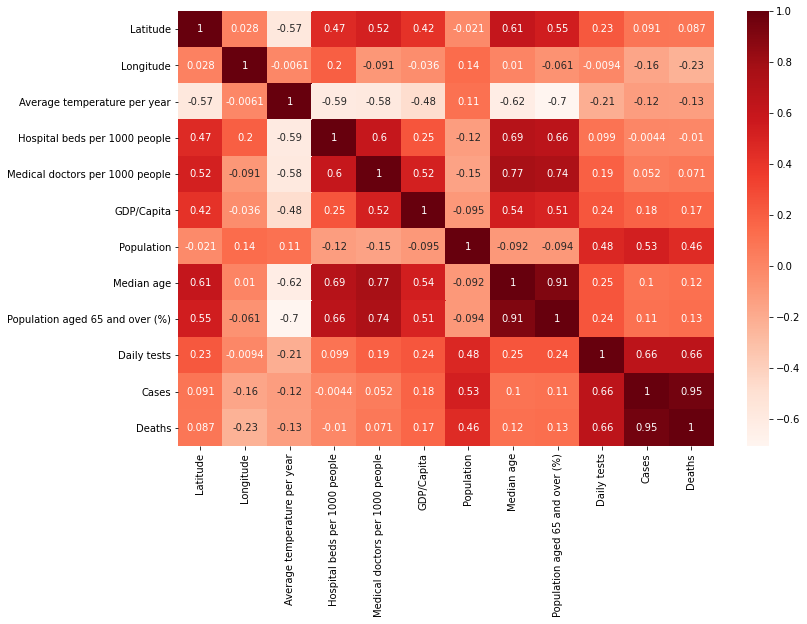

In [9]:
# Keep the last line (date) for each country and drop unused columns
df_last = df.groupby('Entity').tail(1).drop(['Entity', 'Date'], axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(df_last.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

## Output variable curves with line plots

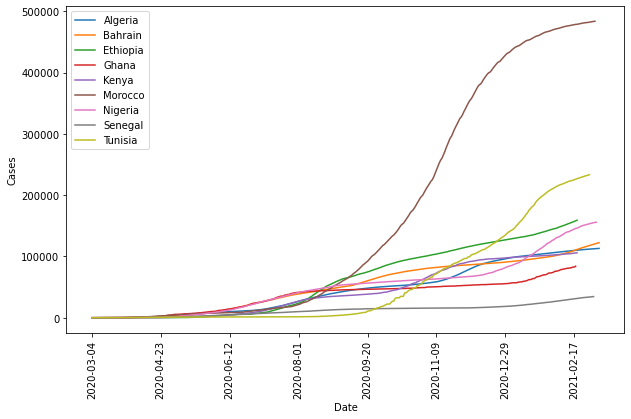

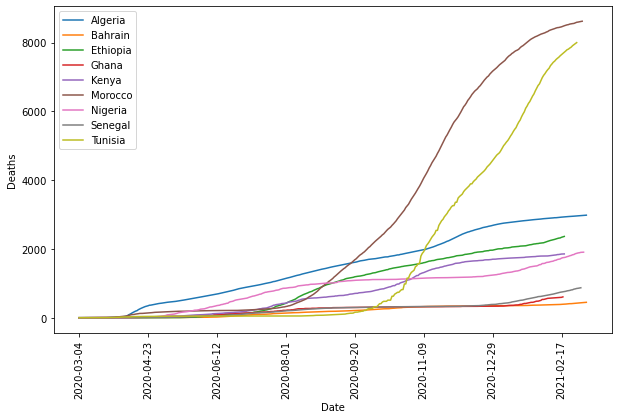

In [10]:
# Target countries and target dates
countries = ['Algeria', 'Bahrain', 'Ethiopia', 'Ghana', 'Kenya', 'Morocco', 'Nigeria', 'Senegal', 'Tunisia']
df_temp = df.loc[df['Date'] > '2020-02-25']

# Plot case and death curves
for output_variable in ['Cases', 'Deaths']:
    fig, ax = plt.subplots(figsize=(10, 6))
    for key, grp in df_temp[df_temp['Entity'].isin(countries)].groupby(['Entity']):
        ax = grp.plot(ax=ax, kind='line', x='Date', y=output_variable, label=key)
    plt.legend(loc='best')
    plt.xticks(rotation=90)
    plt.ylabel(output_variable)
    plt.show()

## Feature-Output-variable distributions with scatter plots: Last cases and deaths to date

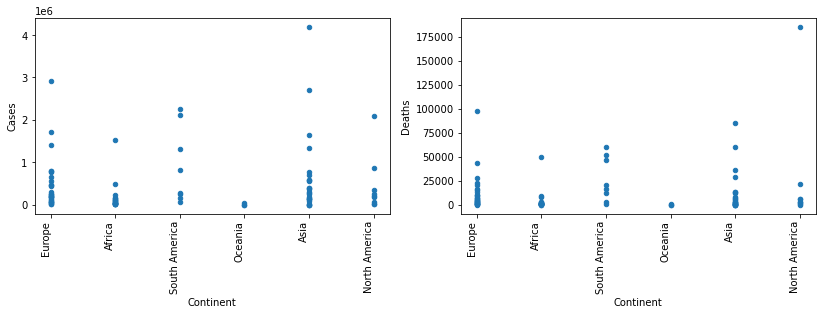

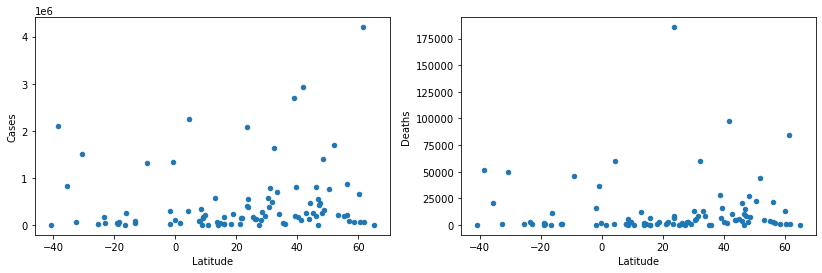

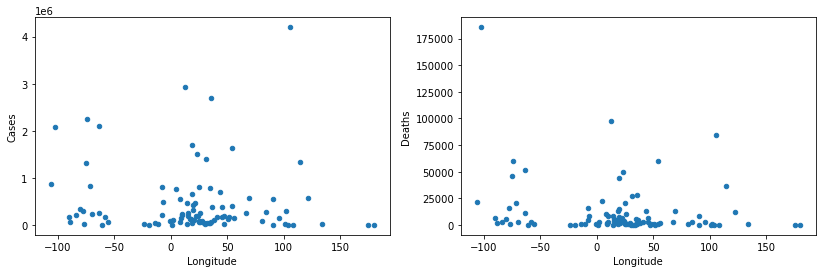

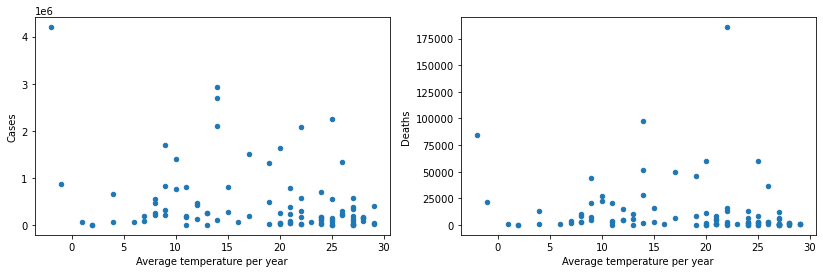

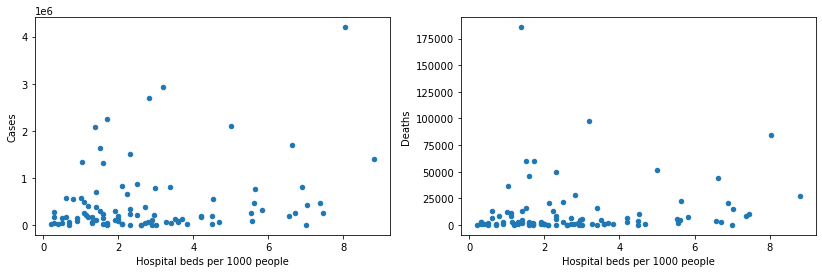

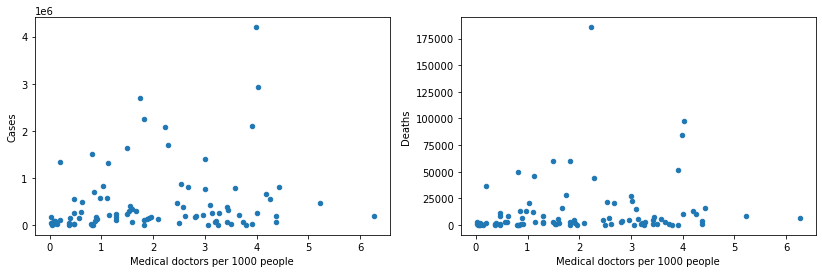

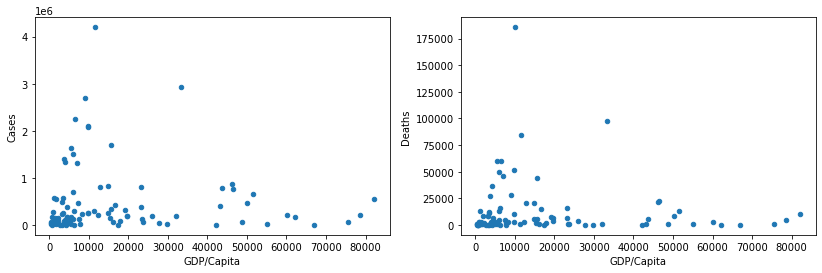

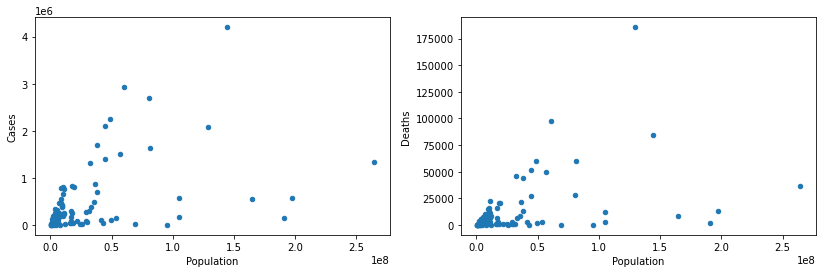

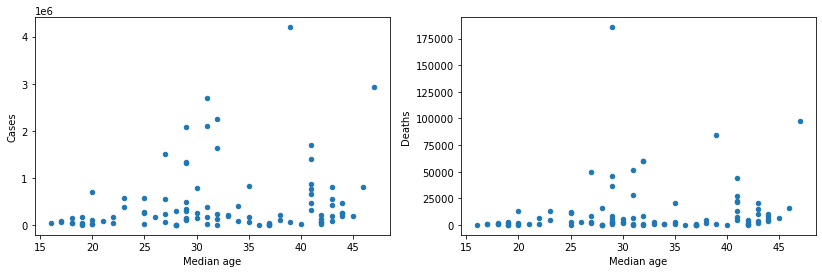

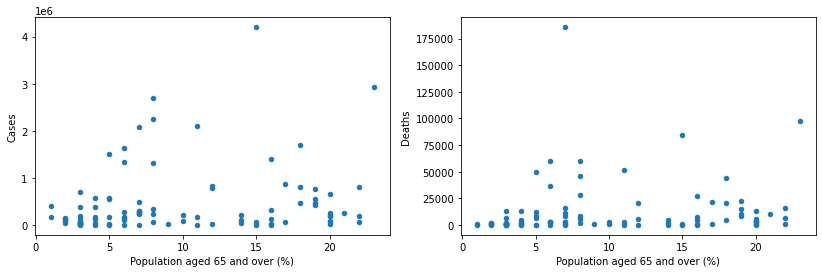

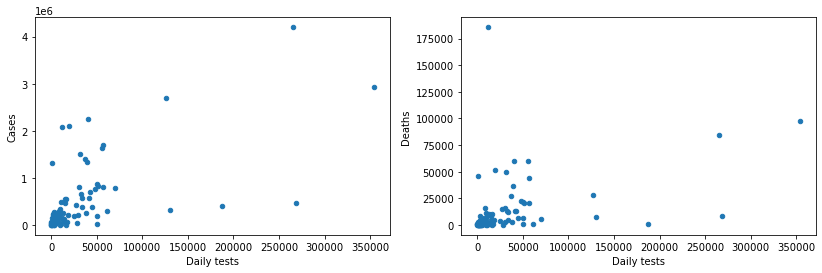

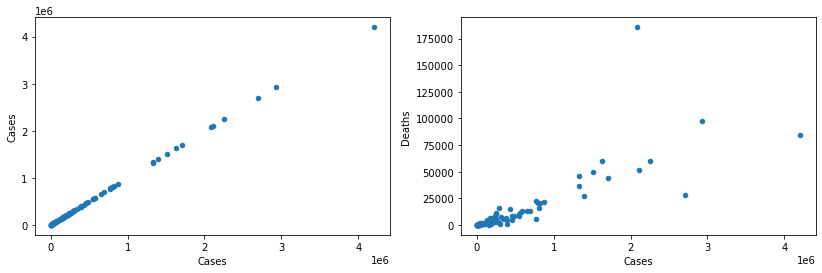

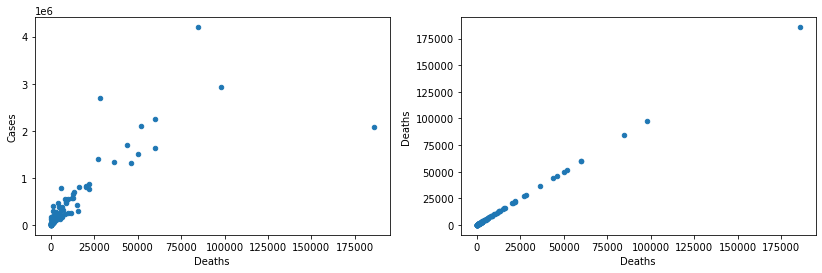

In [11]:
# Scatter plots readability: remove outliers in all comuns except in the column 'Continent'
column_continent = df_last[['Continent']]
df_last = df_last.drop('Continent', axis=1)
df_last = column_continent.join(df_last[(np.abs(zscore(df_last)) < 3).all(axis=1)])

# Plot feature-output-variable distributions for each column
for column in df_last.columns:
    fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
    df_last.plot.scatter(x=column, y='Cases', ax=ax[0])
    df_last.plot.scatter(x=column, y='Deaths', ax=ax[1])
    if column == 'Continent':
        fig.autofmt_xdate(rotation=90)